In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
cc_data = pd.read_csv('cleaned_confirmed_cases.csv')

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import r2_score

In [6]:
cc_data.head()

,Country_Region,Population,Weight,Date,TargetValue,Med. Age,Density (P/Km²),Urban Pop %,Week,Day,Weekday,first_infection,days_since_1st_infect
0,Afghanistan,27657145,0.058359,2020-01-23,0.0,18.0,60,25.0,4,23,3,2020-02-24,-32
1,Afghanistan,27657145,0.058359,2020-01-24,0.0,18.0,60,25.0,4,24,4,2020-02-24,-31
2,Afghanistan,27657145,0.058359,2020-01-25,0.0,18.0,60,25.0,4,25,5,2020-02-24,-30
3,Afghanistan,27657145,0.058359,2020-01-26,0.0,18.0,60,25.0,4,26,6,2020-02-24,-29
4,Afghanistan,27657145,0.058359,2020-01-27,0.0,18.0,60,25.0,5,27,0,2020-02-24,-28


In [7]:
cc_data = pd.concat([cc_data,pd.get_dummies(cc_data['Country_Region'], prefix='country')],axis=1)

In [8]:
cc_data.head()

,Country_Region,Population,Weight,Date,TargetValue,Med. Age,Density (P/Km²),Urban Pop %,Week,Day,...,country_United States,country_Uruguay,country_Uzbekistan,country_Venezuela,country_Vietnam,country_West Bank and Gaza,country_Western Sahara,country_Yemen,country_Zambia,country_Zimbabwe
0,Afghanistan,27657145,0.058359,2020-01-23,0.0,18.0,60,25.0,4,23,...,0,0,0,0,0,0,0,0,0,0
1,Afghanistan,27657145,0.058359,2020-01-24,0.0,18.0,60,25.0,4,24,...,0,0,0,0,0,0,0,0,0,0
2,Afghanistan,27657145,0.058359,2020-01-25,0.0,18.0,60,25.0,4,25,...,0,0,0,0,0,0,0,0,0,0
3,Afghanistan,27657145,0.058359,2020-01-26,0.0,18.0,60,25.0,4,26,...,0,0,0,0,0,0,0,0,0,0
4,Afghanistan,27657145,0.058359,2020-01-27,0.0,18.0,60,25.0,5,27,...,0,0,0,0,0,0,0,0,0,0


In [9]:
diff_split_cc_data = cc_data.copy()
# dropping first infection along with country and date
cc_data.drop(['Country_Region', 'Date', 'first_infection'],axis=1, inplace=True)

In [10]:
feature_cols = list(cc_data)
feature_cols.remove('TargetValue')

In [11]:
cc_data.sort_values('Day')

,Population,Weight,TargetValue,Med. Age,Density (P/Km²),Urban Pop %,Week,Day,Weekday,days_since_1st_infect,...,country_United States,country_Uruguay,country_Uzbekistan,country_Venezuela,country_Vietnam,country_West Bank and Gaza,country_Western Sahara,country_Yemen,country_Zambia,country_Zimbabwe
16934,3814672,0.065988,0.0,30.0,58,68.00,9,1,6,-9,...,0,0,0,0,0,0,0,0,0,0
8325,1882450,0.069213,0.0,18.0,239,59.00,5,1,5,-45,...,0,0,0,0,0,0,0,0,0,0
993,2994400,0.067059,39.0,35.0,104,63.00,14,1,2,31,...,0,0,0,0,0,0,0,0,0,0
20733,39598700,0.057161,0.0,20.0,25,35.00,5,1,5,-41,...,0,0,0,0,0,0,0,0,0,0
20722,20966000,0.059318,10.0,34.0,341,18.00,23,1,0,126,...,0,0,0,0,0,0,0,0,0,0
8354,1882450,0.069213,0.0,18.0,239,59.00,9,1,6,-16,...,0,0,0,0,0,0,0,0,0,0
8385,1882450,0.069213,0.0,18.0,239,59.00,14,1,2,15,...,0,0,0,0,0,0,0,0,0,0
8314,1802278,0.069422,0.0,23.0,9,87.00,23,1,0,79,...,0,0,0,0,0,0,0,0,0,0
8415,1882450,0.069213,1.0,18.0,239,59.00,18,1,4,45,...,0,0,0,0,0,0,0,0,0,0
8446,1882450,0.069213,0.0,18.0,239,59.00,23,1,0,76,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# good results split

target = cc_data['TargetValue'] #target
features = cc_data[feature_cols]  #features


x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.35)

In [11]:
randomforest = RandomForestRegressor()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
score = r2_score(y_test, y_pred)

In [12]:
score

0.9395135249166944

In [13]:
mask_test = (diff_split_cc_data['Date'] >= '2020-05-20')
mask_train = (diff_split_cc_data['Date'] < '2020-05-20')

In [14]:
test_cc_df = diff_split_cc_data.loc[mask_test]
train_cc_df = diff_split_cc_data.loc[mask_train]

In [15]:
# time based split

y_time_split_cc = train_cc_df['TargetValue']
x_time_split_cc = train_cc_df[feature_cols] 

y_test_time_split_cc = test_cc_df['TargetValue']
x_test_time_split_cc = test_cc_df[feature_cols]

In [33]:
randomforest = RandomForestRegressor()
randomforest.fit(x_time_split_cc, y_time_split_cc)
y_time_split_pred = randomforest.predict(x_test_time_split_cc)
score_time_split = r2_score(y_test_time_split_cc, y_time_split_pred)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [34]:
score_time_split

0.8993485473637777

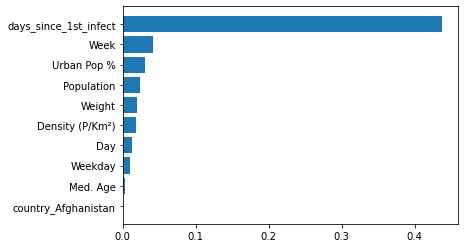

In [37]:
feature_imp = randomforest.feature_importances_[:10]
sorted_idx = np.argsort(feature_imp)
pos = np.arange(sorted_idx.shape[0])+.5

plt.barh(pos, feature_imp[sorted_idx], align='center')
plt.yticks(pos, np.array(list(x_time_split_cc))[sorted_idx])
plt.show()

In [20]:
import eli5
from eli5.sklearn import PermutationImportance

In [21]:
perm = PermutationImportance(randomforest, cv = None, refit = False, n_iter = 50).fit(x_time_split_cc, y_time_split_cc)

In [22]:
eli5.show_weights(perm, feature_names= list(x_time_split_cc))

Weight,Feature
1.4787 ± 0.1773,country_United States
0.8355 ± 0.1090,days_since_1st_infect
0.1960 ± 0.0152,Week
0.1714 ± 0.0221,Density (P/Km²)
0.1017 ± 0.0091,Weight
0.0661 ± 0.0132,Urban Pop %
0.0575 ± 0.0060,Population
0.0144 ± 0.0038,Day
0.0127 ± 0.0031,Weekday
0.0107 ± 0.0015,country_Spain


In [25]:
f_data = pd.read_csv('cleaned_fatalities.csv')

In [26]:
f_data.head()

,Country_Region,Population,Weight,Date,TargetValue,Med. Age,Density (P/Km²),Urban Pop %,Week,Day,Weekday,first_infection,days_since_1st_infect
0,Afghanistan,27657145,0.583587,2020-01-23,0.0,18.0,60,25.0,4,23,3,2020-02-24,-32
1,Afghanistan,27657145,0.583587,2020-01-24,0.0,18.0,60,25.0,4,24,4,2020-02-24,-31
2,Afghanistan,27657145,0.583587,2020-01-25,0.0,18.0,60,25.0,4,25,5,2020-02-24,-30
3,Afghanistan,27657145,0.583587,2020-01-26,0.0,18.0,60,25.0,4,26,6,2020-02-24,-29
4,Afghanistan,27657145,0.583587,2020-01-27,0.0,18.0,60,25.0,5,27,0,2020-02-24,-28


In [27]:
mask_f_test = (f_data['Date'] >= '2020-05-20')
mask_f_train = (f_data['Date'] < '2020-05-20')

In [28]:
test_f_df = diff_split_cc_data.loc[mask_f_test]
train_f_df = diff_split_cc_data.loc[mask_f_train]

In [29]:
# time based split

y_time_split_f = train_f_df['TargetValue']
x_time_split_f = train_f_df[feature_cols] 

y_test_time_split_f = test_f_df['TargetValue']
x_test_time_split_f = test_f_df[feature_cols]

In [30]:
randomforest = RandomForestRegressor()
randomforest.fit(x_time_split_f, y_time_split_f)
y_time_split_f_pred = randomforest.predict(x_test_time_split_f)
score_time_split = r2_score(y_test_time_split_f, y_time_split_f_pred)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [31]:
score_time_split

0.8950338397749574

In [32]:
perm = PermutationImportance(randomforest, cv = None, refit = False, n_iter = 50).fit(x_time_split_f, y_time_split_f)
eli5.show_weights(perm, feature_names= list(x_time_split_cc))

Weight,Feature
1.5088 ± 0.1577,country_United States
0.9922 ± 0.1476,days_since_1st_infect
0.1323 ± 0.0200,Density (P/Km²)
0.1092 ± 0.0099,Week
0.0887 ± 0.0072,Weight
0.0676 ± 0.0166,Urban Pop %
0.0650 ± 0.0038,Population
0.0189 ± 0.0055,Day
0.0185 ± 0.0027,country_Spain
0.0150 ± 0.0033,Weekday
